In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime

In [3]:
dataset_train= pd.read_csv("Gas Data Last Month.csv")

dataset_train.drop(
    labels=[24 ,25],
    axis = 0,
    inplace=True
)
dataset_train


,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 27, 2017",2.818,2.896,2.896,2.777,0,-2.49
1,"Oct 26, 2017",2.890,2.929,2.941,2.867,0,-0.99
2,"Oct 25, 2017",2.919,2.991,2.999,2.913,65.78K,-1.85
3,"Oct 24, 2017",2.974,2.971,3.004,2.960,112.76K,-0.57
4,"Oct 23, 2017",2.991,3.001,3.017,2.948,178.93K,0.30
5,"Oct 22, 2017",2.982,3.001,3.015,2.981,0,2.30
6,"Oct 20, 2017",2.915,2.886,2.940,2.856,225.04K,1.46
7,"Oct 19, 2017",2.873,2.868,2.910,2.773,295.77K,0.67
8,"Oct 18, 2017",2.854,2.923,2.941,2.851,205.29K,-3.65
9,"Oct 17, 2017",2.962,2.955,3.026,2.921,202.67K,0.54


In [4]:
training_set = dataset_train.iloc[:,2:3].values
print(training_set)

print(training_set.shape)

[['2.896']
 ['2.929']
 ['2.991']
 ['2.971']
 ['3.001']
 ['3.001']
 ['2.886']
 ['2.868']
 ['2.923']
 ['2.955']
 ['2.960']
 ['2.995']
 ['2.906']
 ['2.882']
 ['2.836']
 ['2.859']
 ['2.895']
 ['2.934']
 ['2.905']
 ['2.925']
 ['3.018']
 ['3.022']
 ['3.059']
 ['2.917']]
(24, 1)


In [5]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set)


[[0.2690583 ]
 [0.41704036]
 [0.69506726]
 [0.60538117]
 [0.73991031]
 [0.73991031]
 [0.22421525]
 [0.14349776]
 [0.39013453]
 [0.53363229]
 [0.55605381]
 [0.71300448]
 [0.31390135]
 [0.20627803]
 [0.        ]
 [0.10313901]
 [0.26457399]
 [0.43946188]
 [0.30941704]
 [0.39910314]
 [0.8161435 ]
 [0.83408072]
 [1.        ]
 [0.3632287 ]]


In [6]:
X_train =[]
y_train =[]
for i in range(2,24):
    X_train.append(scaled_training_set[i-2:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(22, 2)
(22,)


In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(22, 2, 1)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))




In [10]:
regressor.add(Dense(units=1))
regressor.compile(optimizer = 'adam' ,loss = 'mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size =32)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.2923
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2872
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2816
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2768
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2711
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2644
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.2590
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2534
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2471
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.2389
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2318
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2265
Epoch 13/100
1/1 [==============================] - 0s 10ms/s

In [11]:
dataset_test = dataset_train

actual_stock_price = dataset_test.iloc[:,2:3].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-2:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(2,26):
    X_test.append(inputs[i-2:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
actual_stock_price

array([['2.896'],
       ['2.929'],
       ['2.991'],
       ['2.971'],
       ['3.001'],
       ['3.001'],
       ['2.886'],
       ['2.868'],
       ['2.923'],
       ['2.955'],
       ['2.960'],
       ['2.995'],
       ['2.906'],
       ['2.882'],
       ['2.836'],
       ['2.859'],
       ['2.895'],
       ['2.934'],
       ['2.905'],
       ['2.925'],
       ['3.018'],
       ['3.022'],
       ['3.059'],
       ['2.917']], dtype=object)

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(float(predicted_stock_price[0]))
print(1)

2.9578940868377686
1


In [27]:
time =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

   
y1=np.zeros([23])
for i in range (0,23):
    y1[i]=float(predicted_stock_price[i])
y2=np.zeros([23])
for i in range (0,23):
    y2[i]=float(actual_stock_price[i])
print(y1)
print(y2)

[2.95789409 2.93555069 2.93383574 2.94121337 2.94972324 2.94796276
 2.95256639 2.94762206 2.93000889 2.92960429 2.9388268  2.94379401
 2.94603467 2.94755483 2.93340588 2.92822599 2.92273426 2.92725611
 2.93389225 2.93839622 2.93497491 2.94175482 2.95613146]
[2.896 2.929 2.991 2.971 3.001 3.001 2.886 2.868 2.923 2.955 2.96  2.995
 2.906 2.882 2.836 2.859 2.895 2.934 2.905 2.925 3.018 3.022 3.059]


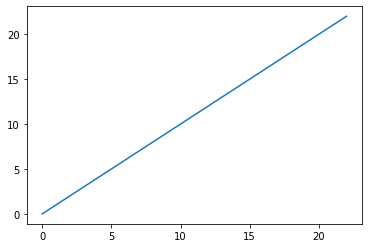

In [28]:
plt.plot(time,time)
plt.show()

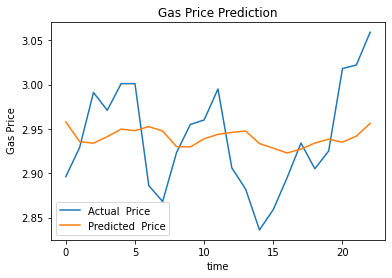

In [31]:

plt.plot(time,y2,label ='Actual  Price')
plt.plot( time,y1,label ='Predicted  Price')
plt.title('Gas Price Prediction')
plt.xlabel('time')
plt.ylabel(' Gas Price')
plt.legend(loc="lower left")

plt.show()